# Simulator Client

This version uses the end-to-end simulator library rather than doing work itself.

In [1]:
import cupy as cp
import viz_cuda
import results
import simulation
from pyinstrument import Profiler
from pyinstrument.renderers import ConsoleRenderer

profiler = Profiler()

mempool = cp.get_default_memory_pool()
mempool.free_all_blocks()
print(f"mempool.used_bytes {mempool.used_bytes()}")

results = results.SimulationResult()
simulator = simulation.Simulator(results, waves = 40, bundles = 10000000, bundle_size = 1)

mempool.used_bytes 0


/home/joel/.local/lib/python3.8/site-packages/cupyx/jit/_interface.py:161: FutureWarning: cupyx.jit.rawkernel is experimental. The interface can change in the future.
  cupy._util.experimental('cupyx.jit.rawkernel')


In [2]:
profiler.reset()
profiler.start()

#simulator.run()
simulator.run_all_waves()

session = profiler.stop()
profile_renderer = ConsoleRenderer(unicode=True, color=True, show_all=True)
print(profile_renderer.render(session))

photon batch energy joules: 1.790e-04
photon batch power watts: 1.790e-01
emitter area m^2: 1.000e-06
batch radiosity w/m^2: 1.790e+05
photon batch energy joules: 1.790e-04
photon batch power watts: 1.790e-01
emitter area m^2: 1.000e-06
batch radiosity w/m^2: 1.790e+05
photon batch energy joules: 1.790e-04
photon batch power watts: 1.790e-01
emitter area m^2: 1.000e-06
batch radiosity w/m^2: 1.790e+05
photon batch energy joules: 1.790e-04
photon batch power watts: 1.790e-01
emitter area m^2: 1.000e-06
batch radiosity w/m^2: 1.790e+05
photon batch energy joules: 1.790e-04
photon batch power watts: 1.790e-01
emitter area m^2: 1.000e-06
batch radiosity w/m^2: 1.790e+05
photon batch energy joules: 1.790e-04
photon batch power watts: 1.790e-01
emitter area m^2: 1.000e-06
batch radiosity w/m^2: 1.790e+05
photon batch energy joules: 1.790e-04
photon batch power watts: 1.790e-01
emitter area m^2: 1.000e-06
batch radiosity w/m^2: 1.790e+05
photon batch energy joules: 1.790e-04
photon batch powe

photon bundle count: 400000000
photon total energy (J): 0.007158363449184318


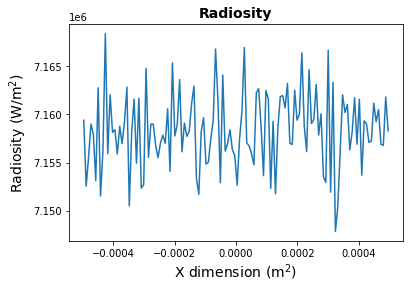

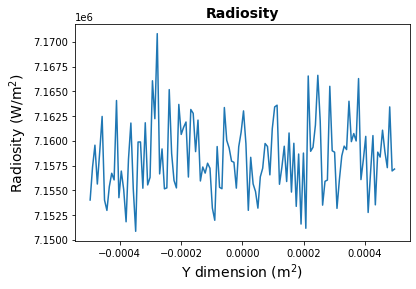

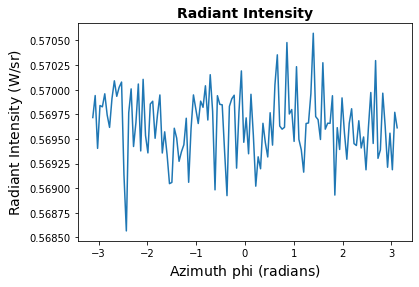

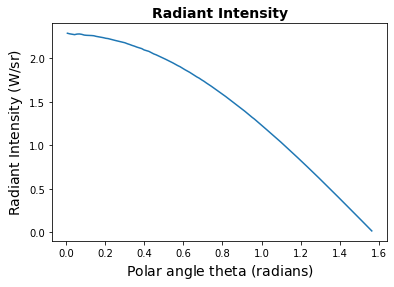

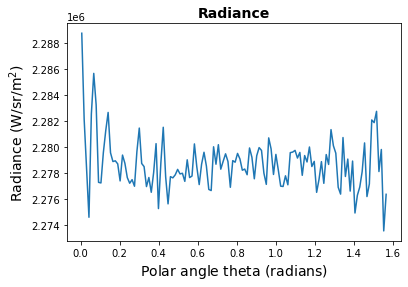

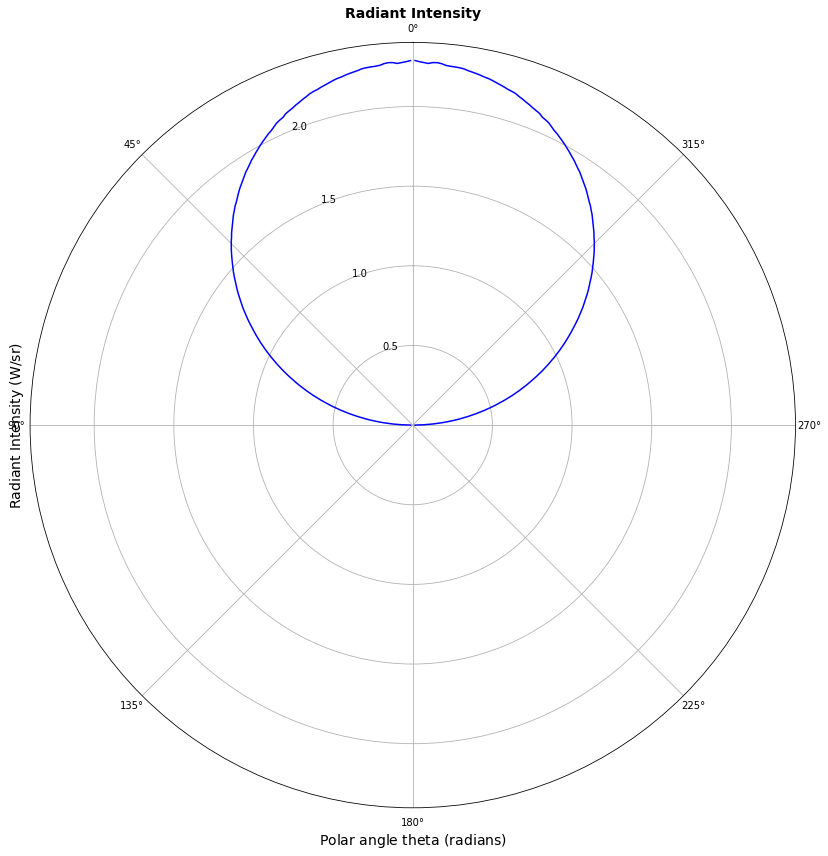

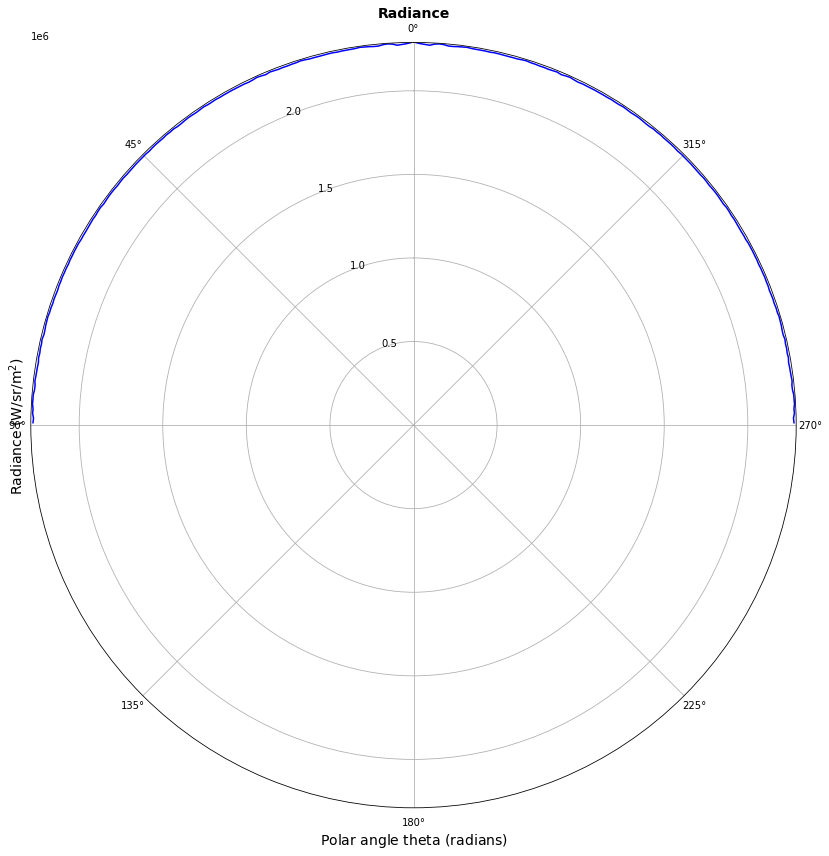

Output()

In [3]:
viz_cuda.summary(results._source_stage)
viz_cuda.plot_all_histograms(results._source_stage)
viz_cuda.plot_stages_3d([results._source_stage])

photon bundle count: 337985193
photon total energy (J): 0.006048552129842665


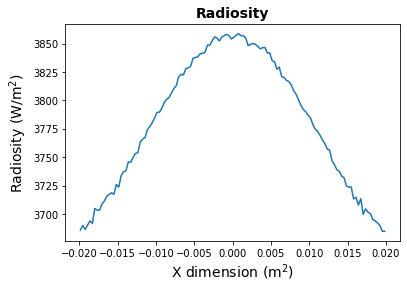

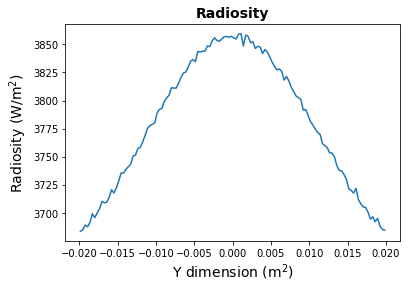

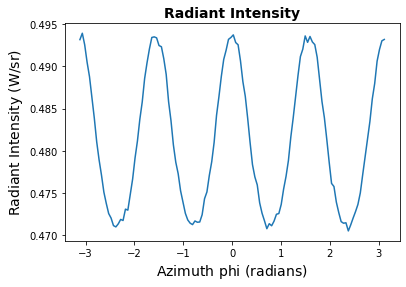

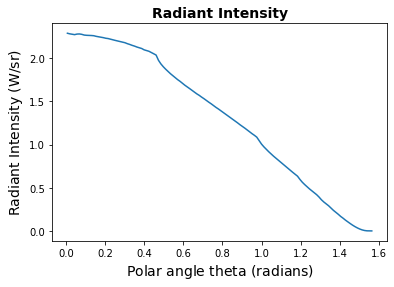

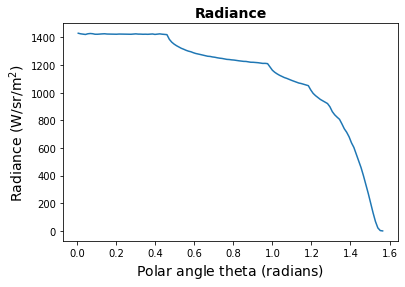

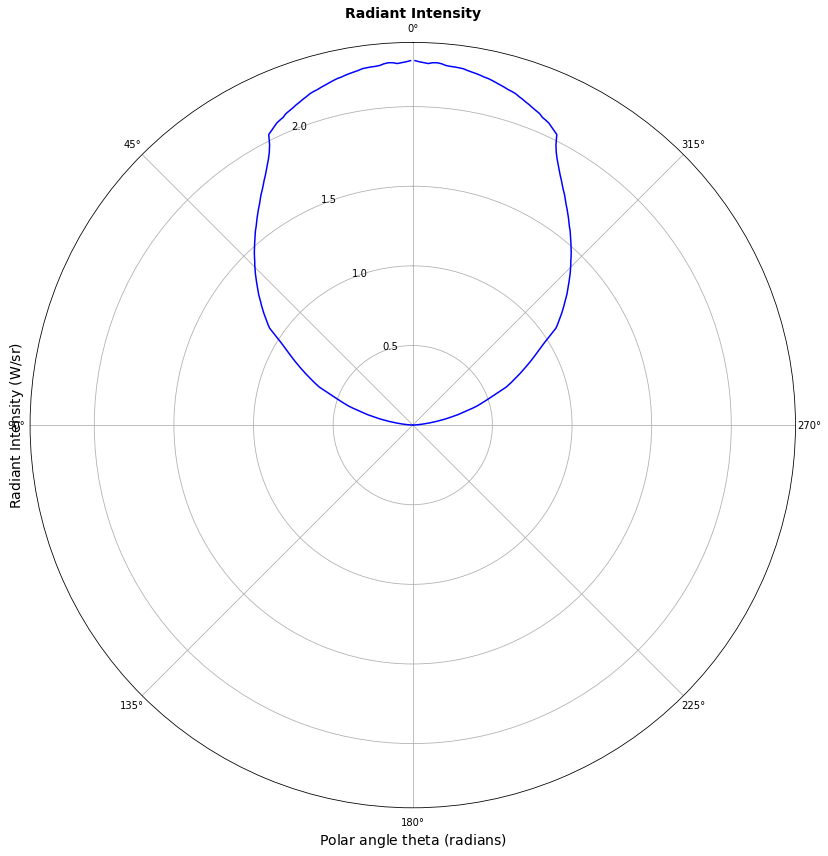

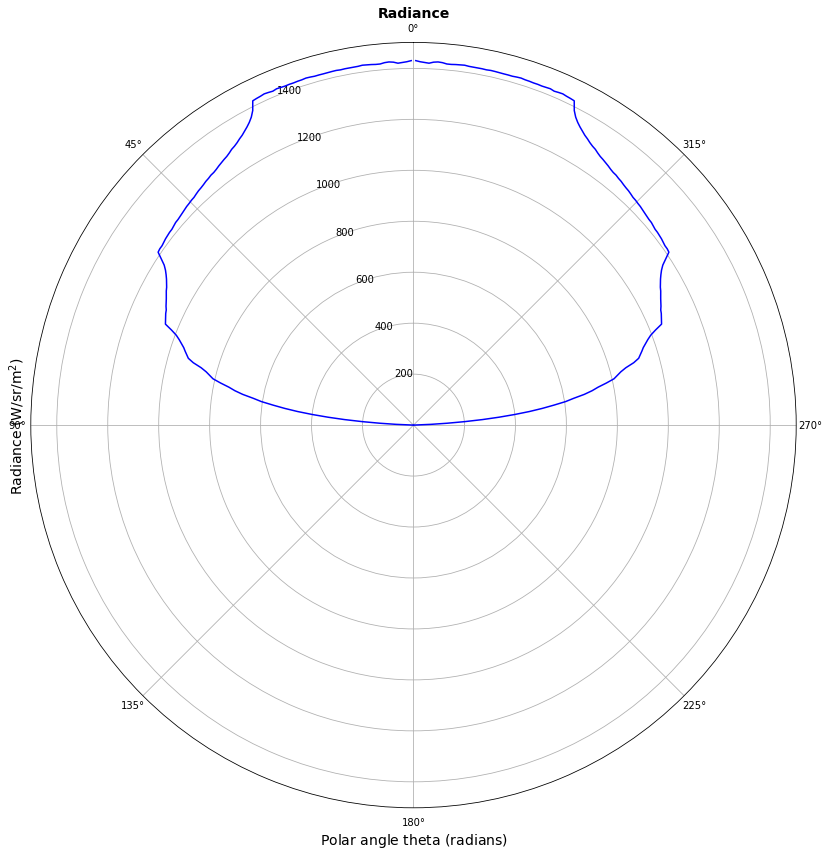

Output()

In [4]:
viz_cuda.summary(results._box_stage)
viz_cuda.plot_all_histograms(results._box_stage)
viz_cuda.plot_stages_3d([results._box_stage])

photon bundle count: 283911930
photon total energy (J): 0.005080861956250116


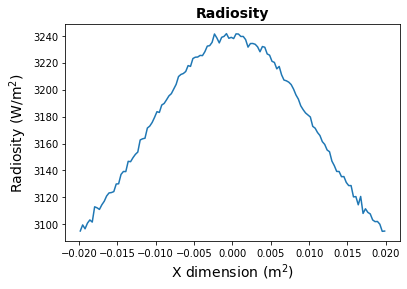

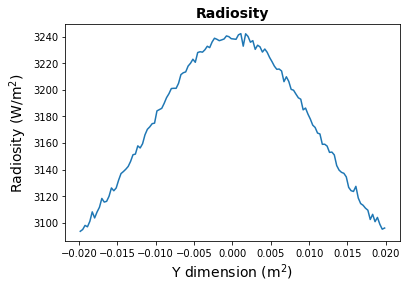

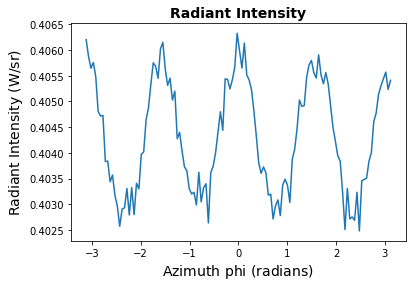

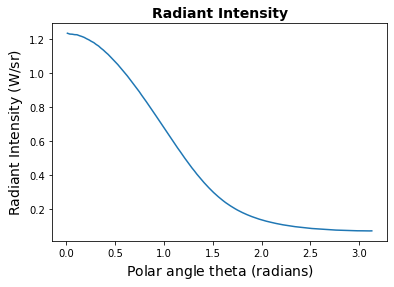

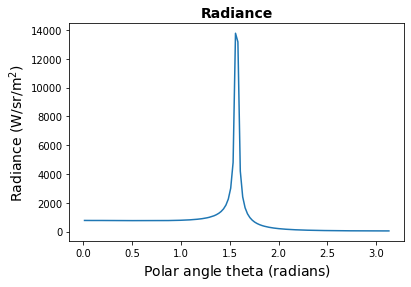

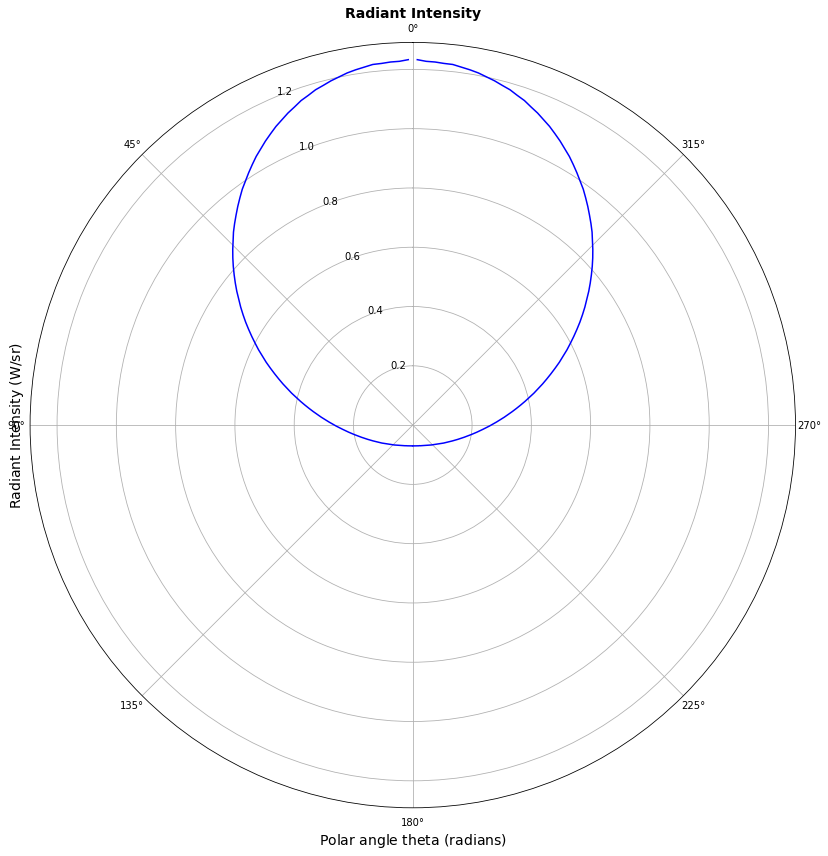

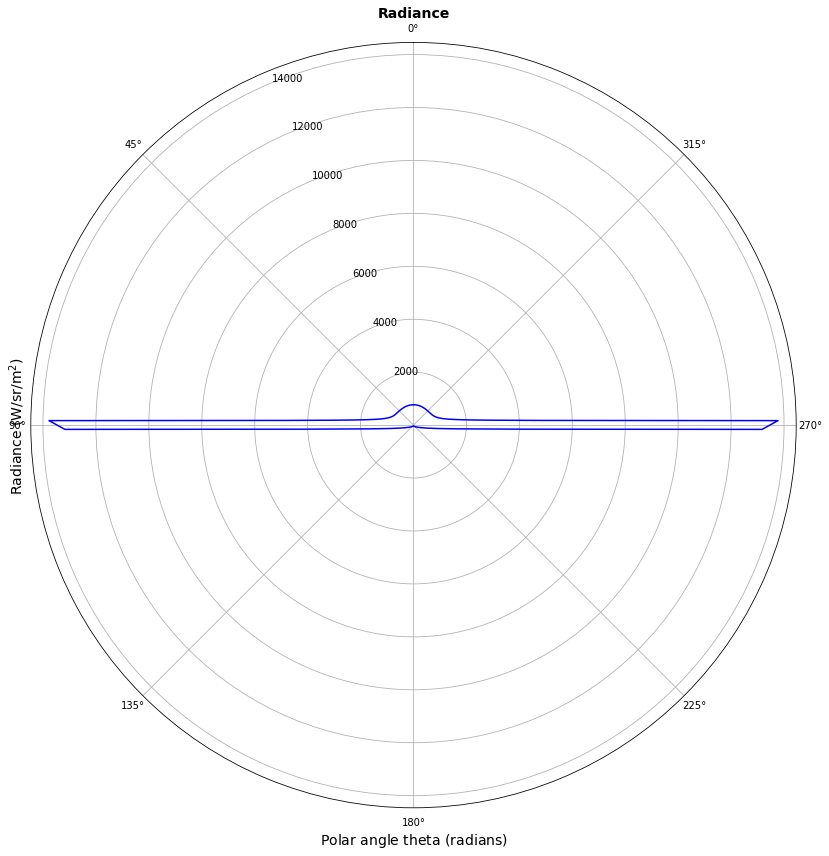

Output()

In [5]:
viz_cuda.summary(results._diffuser_stage)
viz_cuda.plot_all_histograms(results._diffuser_stage)
viz_cuda.plot_stages_3d([results._diffuser_stage])

photon bundle count: 6895
photon total energy (J): 1.233922899553321e-07


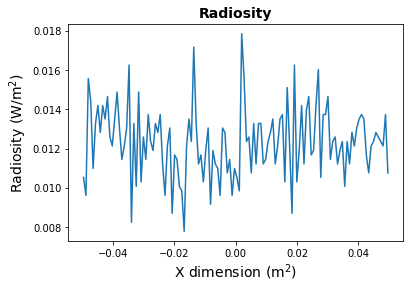

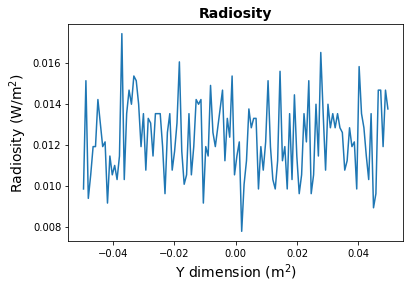

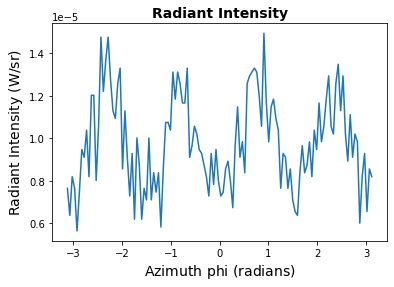

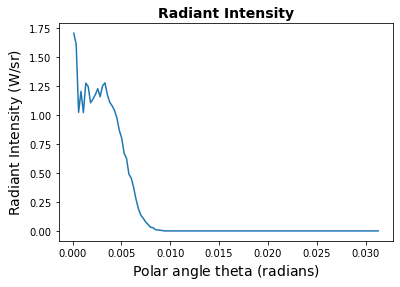

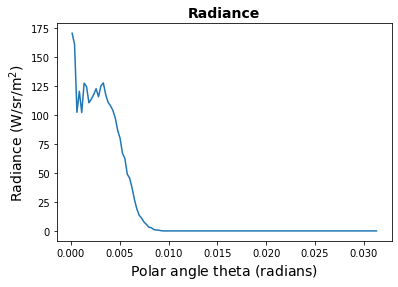

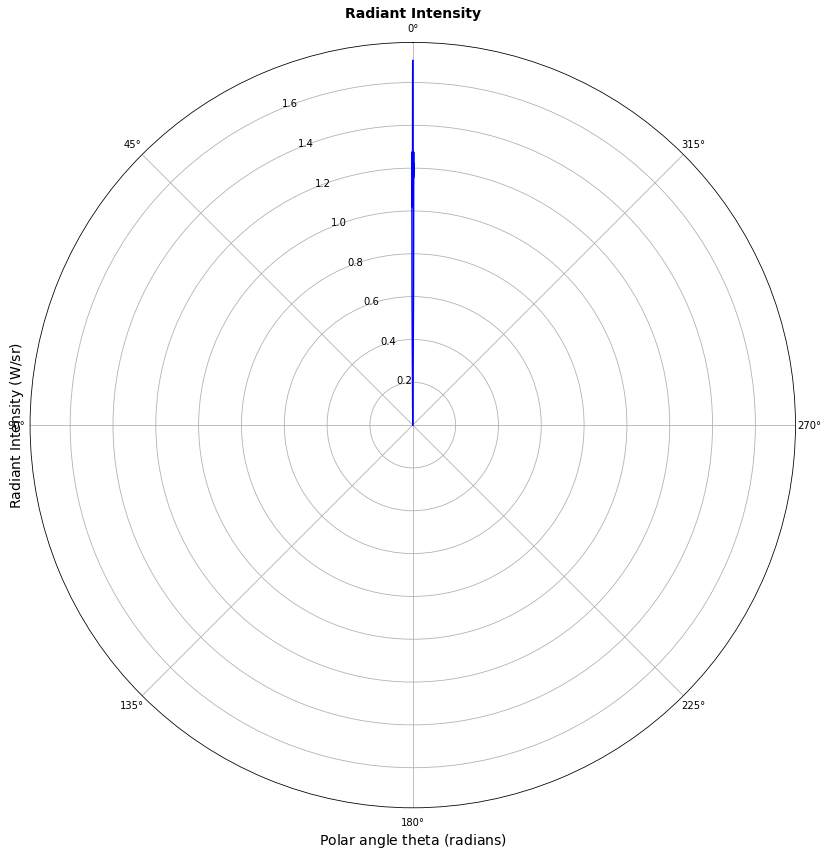

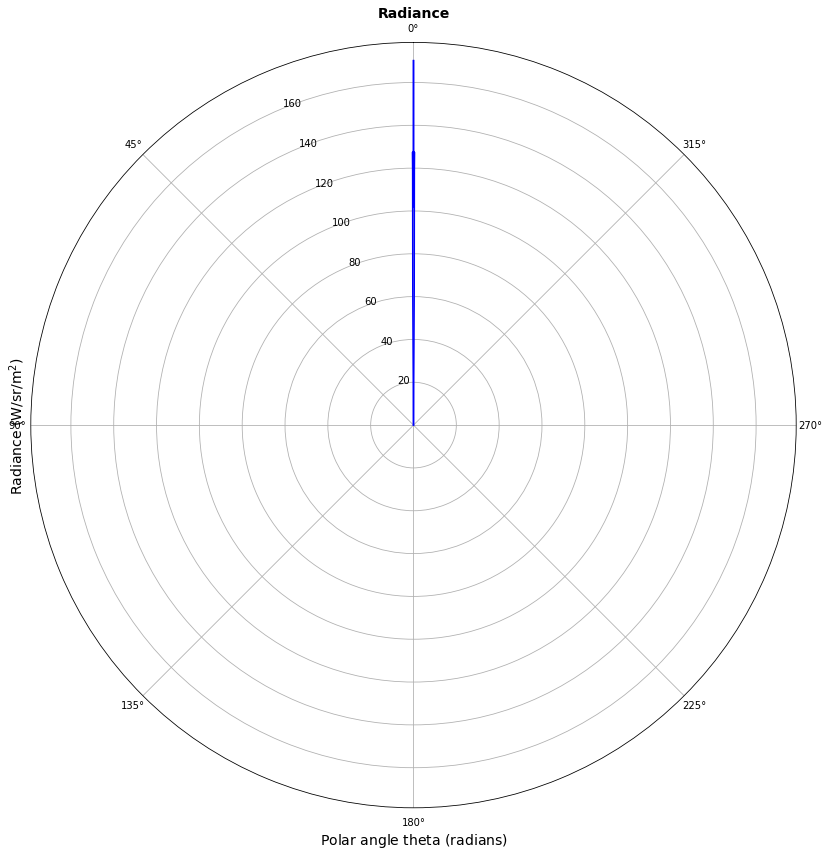

Output()

In [6]:
viz_cuda.summary(results._outbound_stage)
viz_cuda.plot_all_histograms(results._outbound_stage)
viz_cuda.plot_stages_3d([results._outbound_stage])

photon bundle count: 6895
photon total energy (J): 1.233922899553321e-07


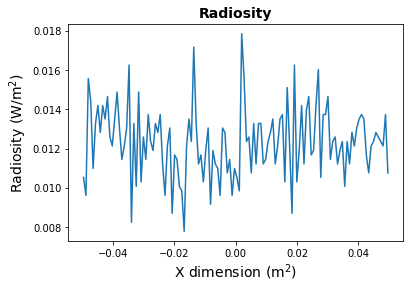

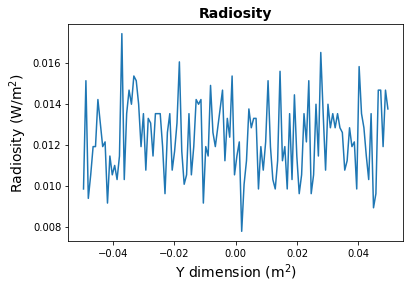

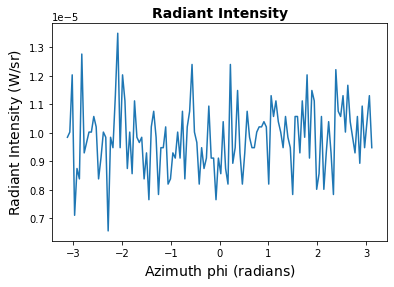

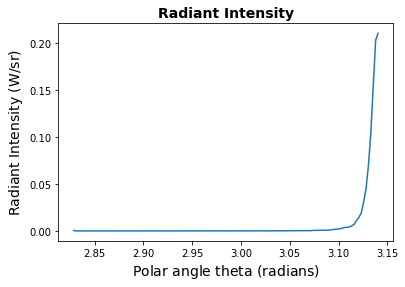

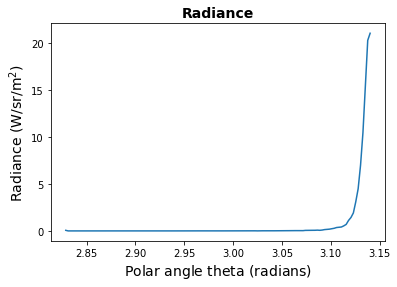

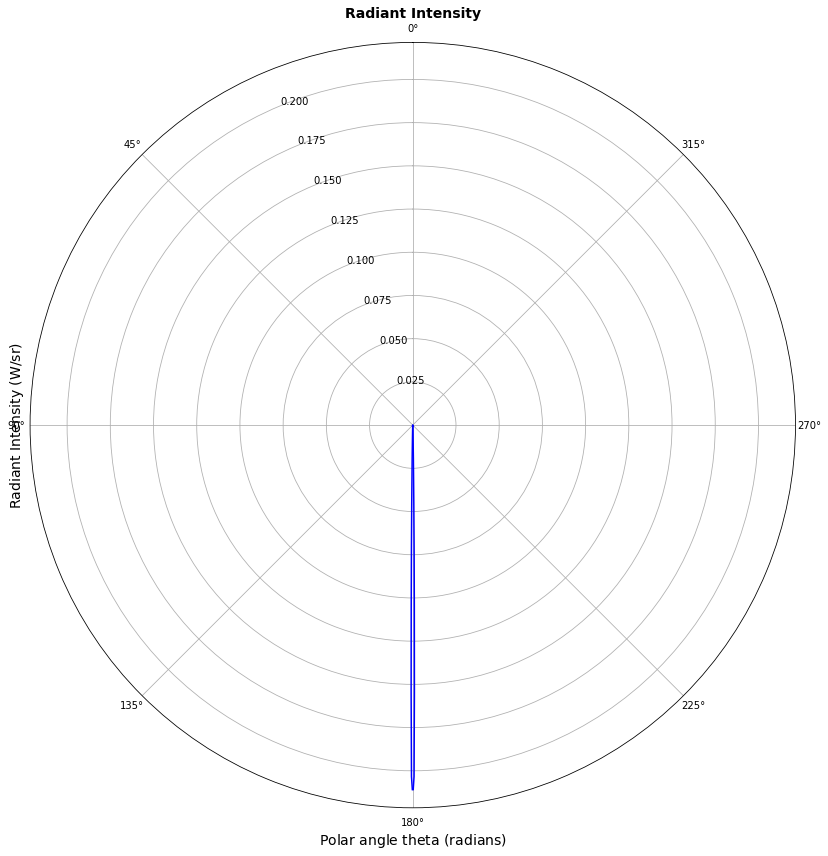

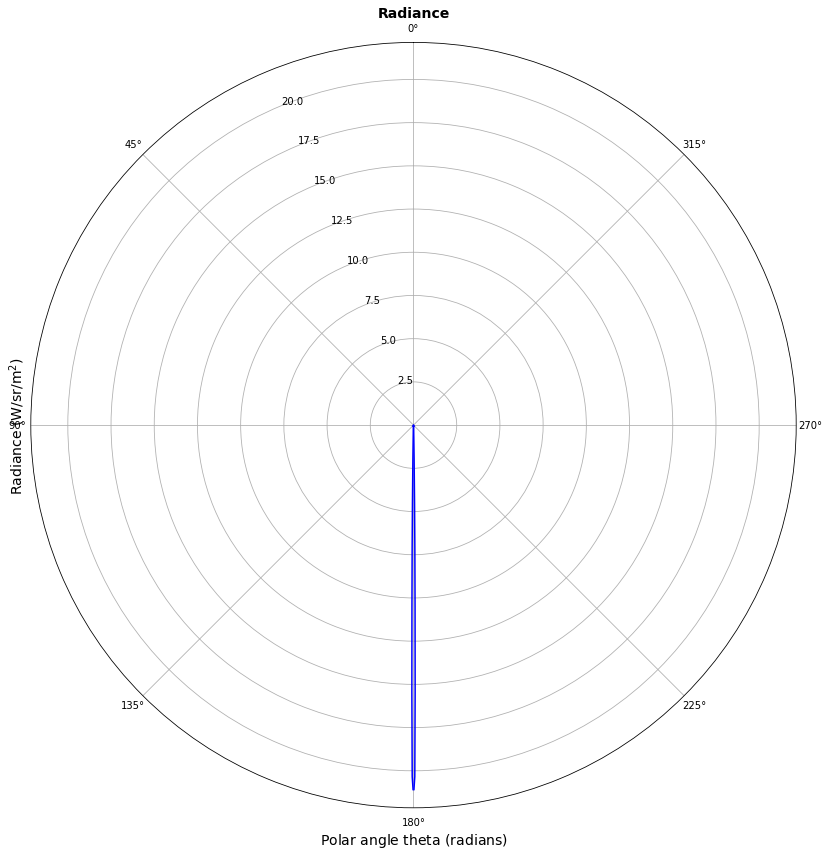

Output()

In [7]:
viz_cuda.summary(results._inbound_stage)
viz_cuda.plot_all_histograms(results._inbound_stage)
viz_cuda.plot_stages_3d([results._inbound_stage])

photon bundle count: 3054
photon total energy (J): 5.465410493452999e-08


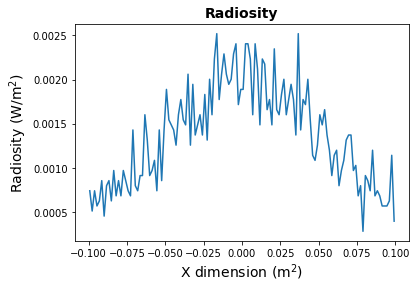

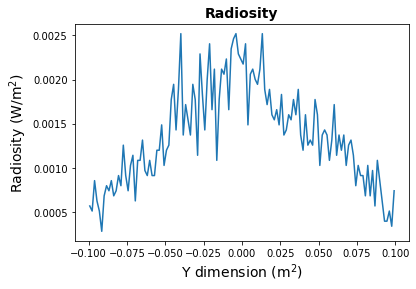

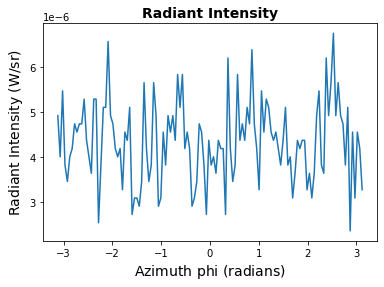

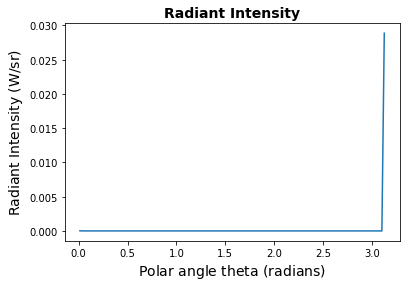

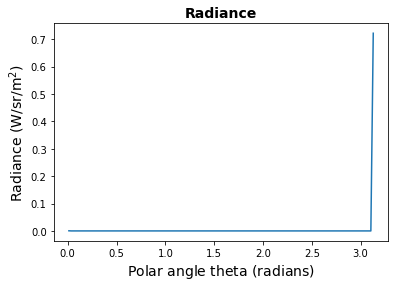

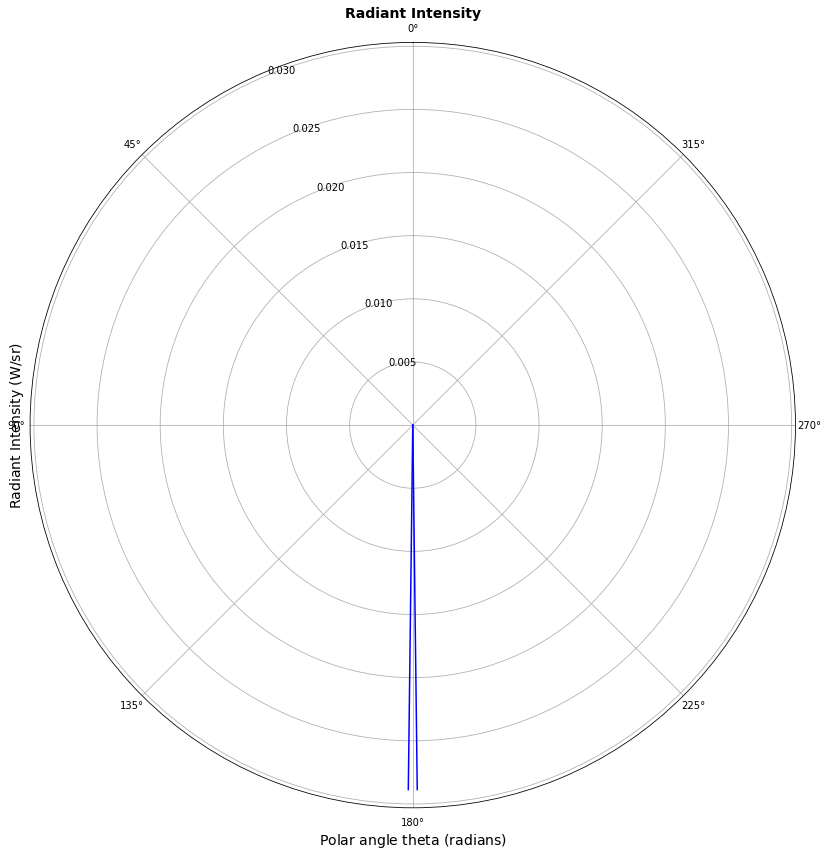

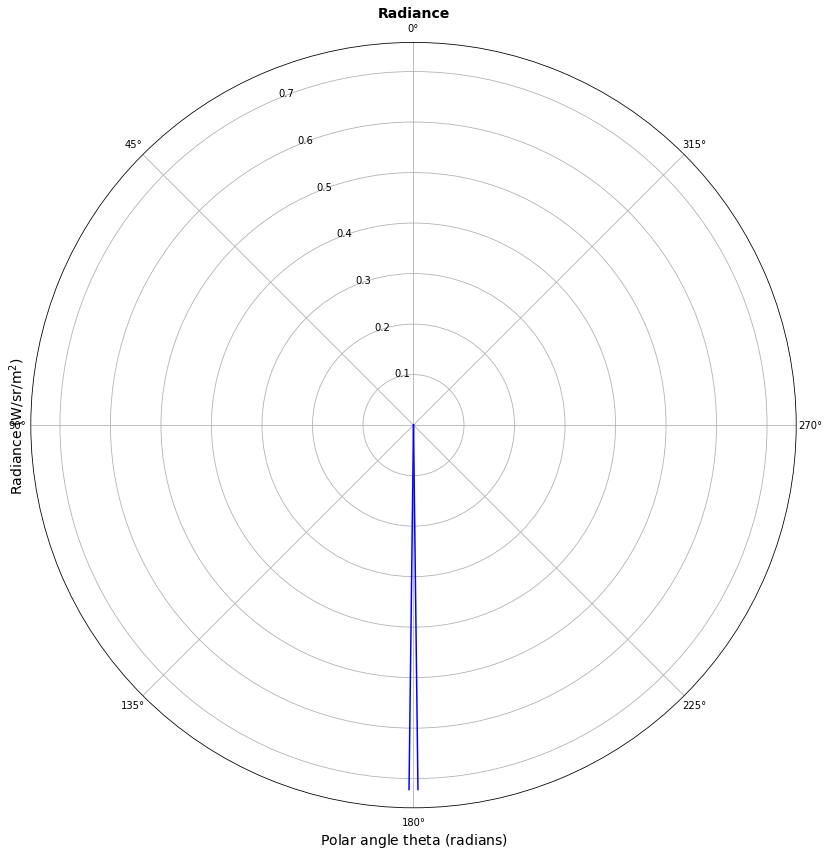

Output()

In [8]:
viz_cuda.summary(results._camera_plane_stage)
viz_cuda.plot_all_histograms(results._camera_plane_stage)
viz_cuda.plot_stages_3d([results._camera_plane_stage])

In [9]:
viz_cuda.plot_stages_3d([results._diffuser_stage, results._camera_plane_stage])

Output()